# Brownian motion

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_formats = {'png', 'retina'}

## sample time equally
___

In [25]:
def simple_brownian(step, dim=1):
    nd = np.hstack((np.zeros((dim, 1)), np.random.randn(dim, step-1)))
    motion = np.cumsum(nd, axis=1)
    if dim == 1:
        motion = motion[0]
    return motion

### 1 dimension

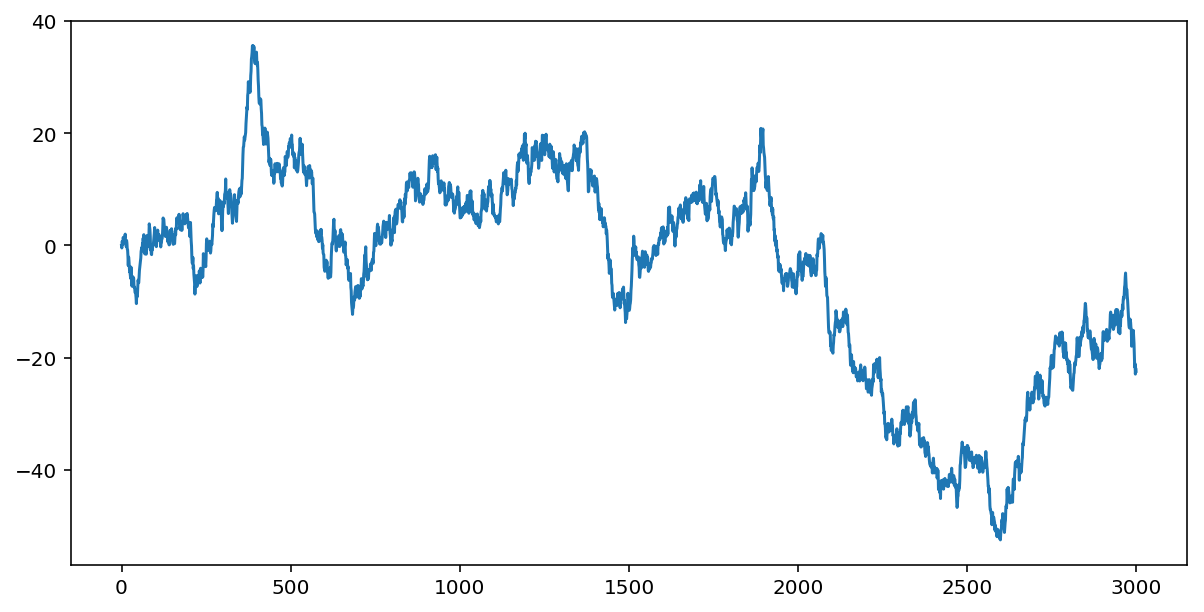

In [3]:
step = 3000

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

x = np.arange(step)
y = simple_brownian(step)

ax.plot(x, y)
plt.show()

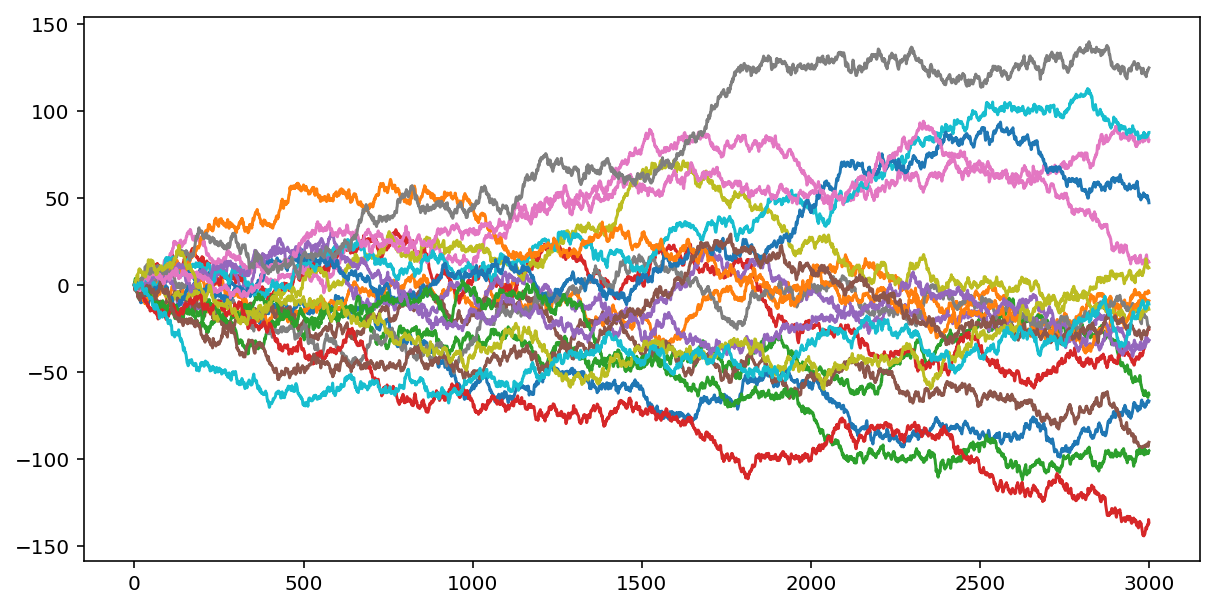

In [4]:
step = 3000
num = 20

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

x = np.arange(step)
for _ in range(num):
    y = simple_brownian(step)
    ax.plot(x, y)

plt.show()

### 2 dimension

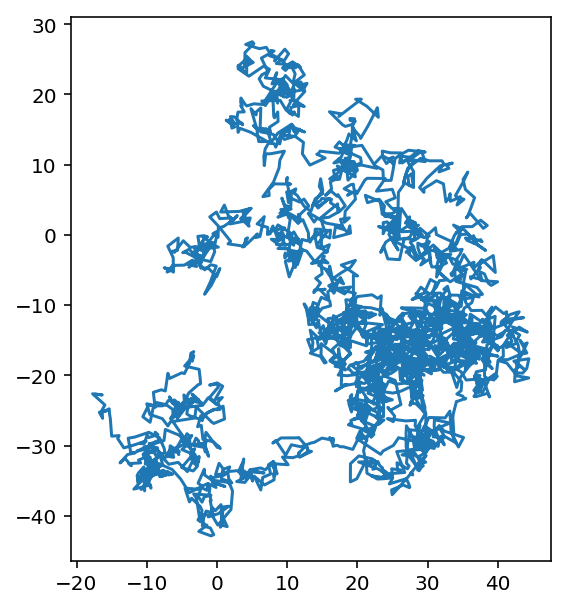

In [5]:
step = 3000
dim = 2

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
plt.gca().set_aspect('equal', adjustable='box') # equalize the scales of x-axis and y-axis

x, y = simple_brownian(step, dim)
ax.plot(x, y)
plt.show()

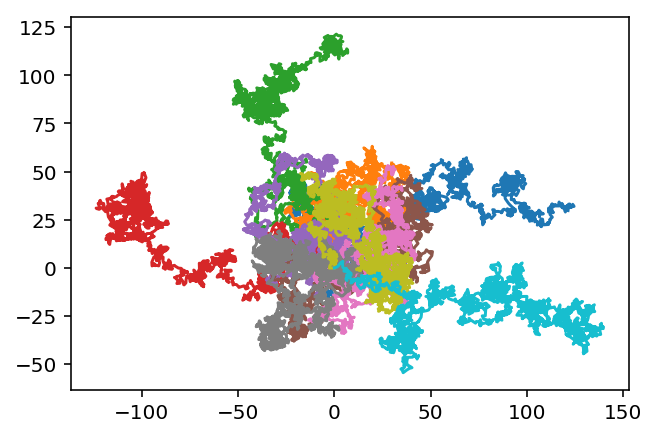

In [6]:
step = 3000
dim = 2
num = 10

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
plt.gca().set_aspect('equal', adjustable='box')

for _ in range(num):
    x, y = simple_brownian(step, dim)
    ax.plot(x, y)

plt.show()

### 3 dimension

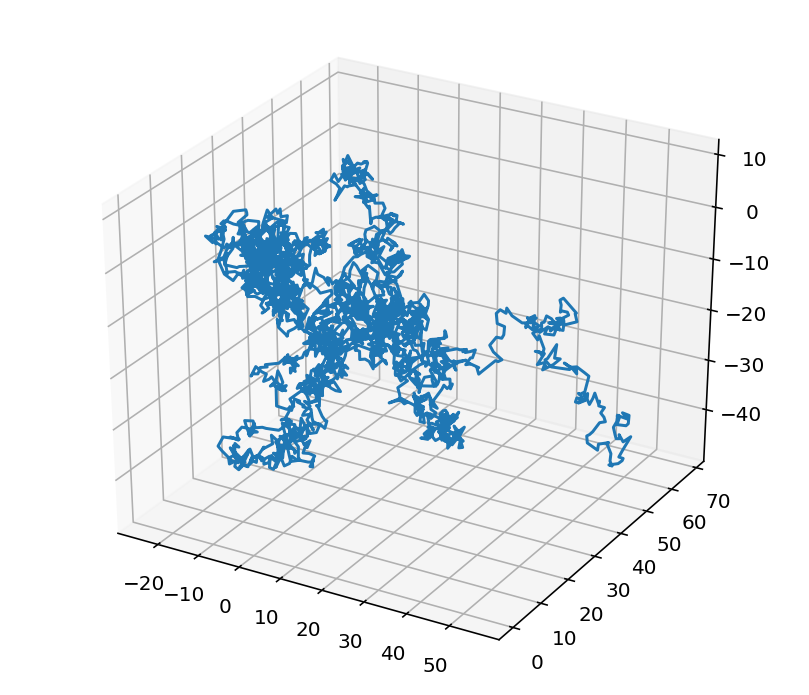

In [10]:
from mpl_toolkits.mplot3d import Axes3D

step = 3000
dim = 3

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
plt.gca().set_aspect('equal', adjustable='box')

x, y, z = simple_brownian(step, dim)
ax.plot(x, y, z)
plt.show()

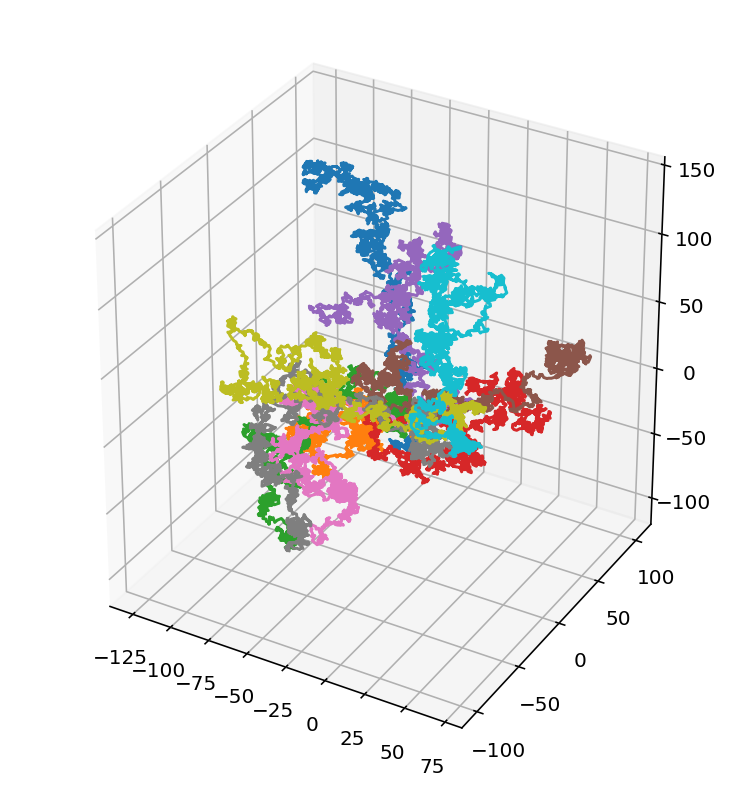

In [9]:
step = 3000
dim = 3
num = 10

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
plt.gca().set_aspect('equal', adjustable='box')

for _ in range(num):
    x, y, z = simple_brownian(step, dim)
    ax.plot(x, y, z)
plt.show()

## Recurrency of Brownian motion
Fact: 1 dimensional Brownian motions have the recursiveness, but 2 or more dimensional Brownian motions don't.
___

### 1 dimension

In [21]:
step = 3000
num = 10000

ys = simple_brownian(step, num)
ys_next = np.hstack((np.zeros((num, 1)), ys))[:, :-1]

products = ys * ys_next
cross_num = np.sum(np.any(products < 0, axis=1))
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 10000
Cross number: 9797
Probability: 0.9797


### 2 dimension

In [10]:
step = 3000
dim = 2
num = 10000

cross_num = 0
for n in range(num):
    nd = np.hstack((np.zeros((dim, 1)), np.random.randn(dim, step-1)))
    motion = np.cumsum(nd, axis=1)
    quatients = motion[:, 2:] / nd[:, 2:]
    n_q = quatients / np.max(quatients, axis=0)
    diff = abs(n_q[0] - n_q[1])
    cross_num += np.any(diff < 1e-5)
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 10000
Cross number: 39
Probability: 0.0039
